# 모델 학습의 핵심
> 실제 세상의 정답(Ground Truth)와 예측치(Predicted Value)를 가능한한 일치하는것
- 실제 세상의 정답과 예측치를 일치시키는 테크닉을 "모델 학습 전략 및 최적화"라고 볼 수 있다

# CrossEntropyLoss

- 가능한 후보군에서 예측 된 확률 분포가 **실제 분포와 얼마나 가까운지**를 나타내며, **CrossEntropyLoss 값을 최소화** 시키는 것이 모델 학습의 목표
- $ loss(x, class) = -\log\left(\frac{\exp(x[class])}{\sum_j \exp(x[j])}\right) = -x[class] + \log\left(\sum_j \exp(x[j])\right) $






In [1]:
# 예제
import torch
import torch.nn as nn

loss_function = nn.CrossEntropyLoss()

In [2]:
loss = loss_function(torch.tensor([[
    0.8982,
    0.805,
    0.6393,
    0.9983,
    0.5731,
    0.0469,
    0.556,
    0.1476,
    1.2404,
    0.5544
]]), torch.LongTensor([3]))
loss.item()

2.0085251331329346

In [3]:
loss = loss_function(torch.tensor([[
    3e-5,
    5e-3,
    1e-6,
    0.9204,
    2e-3,
    3e-4,
    5e-4,
    5e-5,
    0.176,
    5e-4
]]), torch.LongTensor([3]))
loss.item()

1.5401395559310913

In [4]:
loss = loss_function(torch.tensor([[
    3e-8,
    5e-5,
    1e-6,
    2.4204,
    2e-5,
    3e-5,
    5e-4,
    5e-5,
    6e-4,
    5e-4
]]), torch.LongTensor([3]))
loss.item()

0.5878590941429138

# 경사 하강법 (Gradient Descent)
- 기울기가 중요함

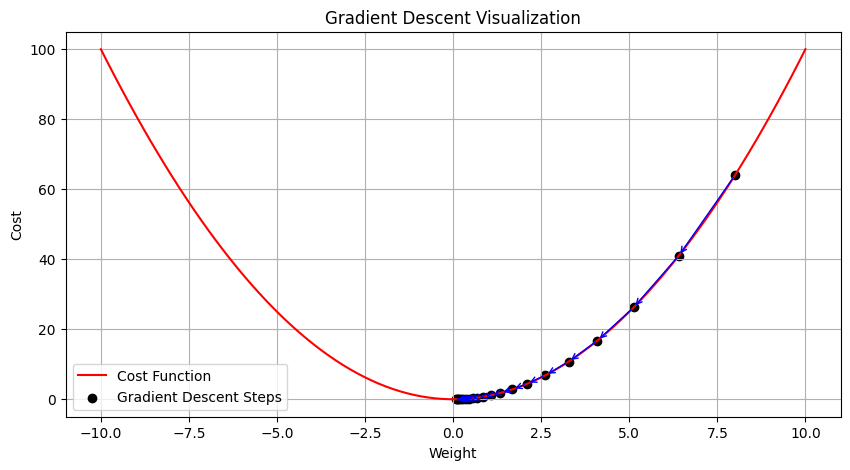

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# 비용 함수 정의: y = x^2 (예시)
def cost_function(x):
    return x**2

# 비용 함수의 기울기: y' = 2x
def gradient(x):
    return 2 * x

# 초기값 설정
x = 8  # 초기 가중치 값
learning_rate = 0.1  # 학습률
iterations = 20  # 반복 횟수

# 경사 하강법 과정 저장
x_values = [x]
y_values = [cost_function(x)]

for _ in range(iterations):
    grad = gradient(x)  # 기울기 계산
    x -= learning_rate * grad  # 가중치 업데이트
    x_values.append(x)
    y_values.append(cost_function(x))

# 그래프 그리기
x_range = np.linspace(-10, 10, 100)
y_range = cost_function(x_range)

plt.figure(figsize=(10, 5))

# 비용 함수 그래프
plt.plot(x_range, y_range, label="Cost Function", color="red")

# 경사 하강법 과정 표시
plt.scatter(x_values, y_values, color="black", label="Gradient Descent Steps")
for i in range(len(x_values) - 1):
    plt.annotate("", xy=(x_values[i+1], y_values[i+1]), xytext=(x_values[i], y_values[i]),
                 arrowprops=dict(arrowstyle="->", color="blue"))

# 그래프 설정
plt.title("Gradient Descent Visualization")
plt.xlabel("Weight")
plt.ylabel("Cost")
plt.legend()
plt.grid()
plt.show()


# ADAM (Adaptive Moment Estimation)

In [20]:
from graphviz import Digraph

# 그래프 생성
dot = Digraph(format='png', engine='dot')
dot.attr(rankdir='LR')  # 왼쪽에서 오른쪽 방향으로 정렬
dot.attr(dpi='300')  # 고해상도 설정

# 노드 스타일 정의
dot.attr('node', shape='ellipse', style='filled', fontsize='10', fontname='Arial')

# 노드 추가
dot.node('GD', 'GD\n오차의 정도를 계산 후\n가장 이점이 되는 기울기를 기반으로\n다음 스텝 결정', color='black', fillcolor='white')
dot.node('SGD', 'SGD\n확률 휴리스틱 모델을 응용하여\n다음 스텝을 결정하는 판단 계산 최적화', color='black', fillcolor='white')
dot.node('Momentum', 'Momentum\n스텝을 계산할 때\n이전 관성을 이용하여\n다음 스텝 방향 계산', color='black', fillcolor='#FFC0CB')  # 분홍색
dot.node('NAG', 'NAG\n관성 방향을 먼저 계산 후\n스텝 연산하여 연산 최적화', color='black', fillcolor='#FFC0CB')  # 분홍색
dot.node('Adagrad', 'Adagrad\n동일 방향에 대해서는 스텝을 정밀하게,\n새로운 방향에 대해서는 스텝 크기 최적화', color='black', fillcolor='#90EE90')  # 연녹색
dot.node('RMSProp', 'RMSProp\n가까운 과거의 맥락을 더 높게 반영,\n지수 이동 평균을 이용하여 개선', color='black', fillcolor='#90EE90')  # 연녹색
dot.node('AdaDelta', 'AdaDelta\n보폭이 너무 정밀해져 학습 효율이 안나오는 문제 개선', color='black', fillcolor='#90EE90')  # 연녹색
dot.node('Adam', 'Adam\nMomentum과 RMSProp 두 접근법을 적절하게 합산,\n방향 및 보폭을 최적화', color='black', fillcolor='#FF6347')  # 빨간색
dot.node('Nadam', 'Nadam\nNAG에 RMSProp 두 접근법을 적절하게 합산,\n방향 및 보폭을 최적화\n(Adam과 다르게 NAG 채택)', color='black', fillcolor='#FF6347')  # 빨간색

# 엣지 추가 (화살표와 텍스트 포함)
dot.edge('GD', 'SGD')
dot.edge('SGD', 'Momentum', label='스텝 방향 최적화', fontsize='8')
dot.edge('Momentum', 'NAG')
dot.edge('SGD', 'Adagrad', label='스텝 크기 최적화')
dot.edge('Adagrad', 'RMSProp')
dot.edge('RMSProp', 'AdaDelta')
dot.edge('Momentum', 'Adam')
dot.edge('RMSProp', 'Adam')
dot.edge('Adam', 'Nadam')

# 그래프 출력 (Jupyter Notebook에서 렌더링 가능)
dot.render("optimizer_flow_diagram", view=True)  # PNG 파일로 저장 및 보기



'optimizer_flow_diagram.png'